In [1]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [2]:
import numpy as np
import pandas as pd
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [3]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func, inspect

In [4]:
# create engine to hawaii.sqlite
engine = create_engine("sqlite:///hawaii.sqlite")

In [5]:
# I wanted to know the column names and data types
inspector = inspect(engine)
inspector.get_table_names()

['measurement', 'station']

In [6]:
columns = inspector.get_columns('measurement')
for c in columns:
    print(c['name'], c["type"])

id INTEGER
station TEXT
date TEXT
prcp FLOAT
tobs FLOAT


In [7]:
columns = inspector.get_columns('station')
for c in columns:
    print(c['name'], c["type"])

id INTEGER
station TEXT
name TEXT
latitude FLOAT
longitude FLOAT
elevation FLOAT


In [8]:
# reflect an existing database into a new model
Base = automap_base()
# reflect the tables
Base.prepare(engine, reflect=True)

In [9]:
# View all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

In [10]:
# Save references to each table
Measurement = Base.classes.measurement
Station = Base.classes.station

In [11]:
# Create our session (link) from Python to the DB
session = Session(engine)

# Exploratory Precipitation Analysis

In [12]:
# Find the most recent date in the data set.
results = session.query(Measurement.station, Measurement.date, Measurement.prcp).\
    order_by(Measurement.date.desc()).limit(1)

for r in results:
    print(r)

('USC00519397', '2017-08-23', 0.0)


In [13]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results. 
# Starting from the most recent data point in the database. 
#'2017-08-23'

# Calculate the date one year from the last date in data set.
#'2016-08-23'

# Perform a query to retrieve the data and precipitation scores
singleYearData = session.query(Measurement.id,Measurement.station,Measurement.date,Measurement.prcp, Measurement.tobs).\
filter(Measurement.date <= '2017-08-23').\
        filter(Measurement.date >= '2016-08-23').all()

# Save the query results as a Pandas DataFrame and set the index to the date column
oneYrdf = pd.DataFrame(singleYearData)
oneYrdf.head()

# Sort the dataframe by date
oneYrdf.sort_values('date')





,id,station,date,prcp,tobs
0,2364,USC00519397,2016-08-23,0.00,81.0
1009,8825,USC00517948,2016-08-23,NaN,80.0
1529,14608,USC00519281,2016-08-23,1.79,77.0
704,7331,USC00514830,2016-08-23,0.05,80.0
361,5091,USC00513117,2016-08-23,0.15,76.0
...,...,...,...,...,...
1527,12186,USC00519523,2017-08-22,0.00,82.0
1008,7635,USC00514830,2017-08-23,0.00,82.0
360,2724,USC00519397,2017-08-23,0.00,81.0
1528,12187,USC00519523,2017-08-23,0.08,82.0


Text(0, 0.5, 'Rainfall in Inches')

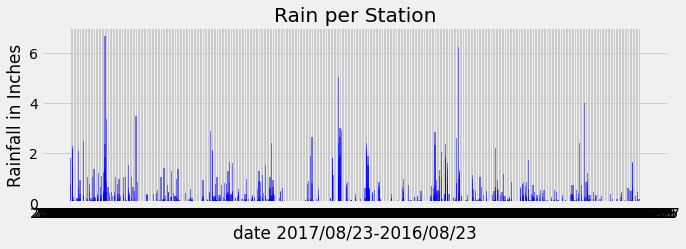

In [14]:
# Use Pandas Plotting with Matplotlib to plot the data
x_axis = np.arange(len(oneYrdf))


plt.figure(figsize=(10,3))
plt.bar(oneYrdf["date"], oneYrdf["prcp"], color='b', alpha=0.5, align="center")
plt.title("Rain per Station")
plt.xlabel("date 2017/08/23-2016/08/23")
plt.ylabel("Rainfall in Inches")

In [15]:
# Use Pandas to calcualte the summary statistics for the precipitation data
oneYrdf.describe()

,id,prcp,tobs
count,2230.000000,2021.000000,2230.000000
mean,10158.570404,0.177279,74.590583
std,5603.500203,0.461190,4.611667
min,2364.000000,0.000000,58.000000
25%,5287.250000,0.000000,72.000000
50%,8930.500000,0.020000,75.000000
75%,14750.750000,0.130000,78.000000
max,19550.000000,6.700000,87.000000


# Exploratory Station Analysis

In [16]:
# Design a query to calculate the total number stations in the dataset
oneYrdf['station'].nunique()

7

In [17]:
# Design a query to find the most active stations (i.e. what stations have the most rows?)
ndo = oneYrdf.groupby('station')
ndo.count().sort_values('prcp', ascending=False)

    
    
# List the stations and the counts in descending order.


,id,date,prcp,tobs
station,,,,
USC00519397,361,361,359,361
USC00519281,352,352,352,352
USC00513117,343,343,343,343
USC00516128,349,349,328,349
USC00519523,337,337,314,337
USC00514830,305,305,265,305
USC00517948,183,183,60,183


In [18]:
# Using the most active station id from the previous query, calculate the lowest, highest, and average temperature.
singleStationdf = oneYrdf.loc[oneYrdf['station']== 'USC00519397']
singleStationdf['tobs'].describe()

count    361.000000
mean      75.210526
std        4.963758
min       60.000000
25%       72.000000
50%       77.000000
75%       79.000000
max       87.000000
Name: tobs, dtype: float64

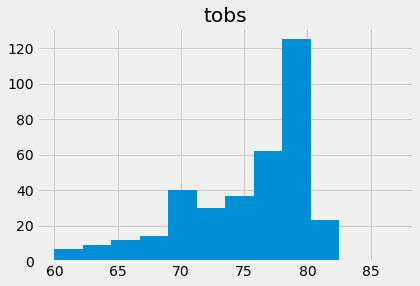

In [19]:
# Using the most active station id
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram
singleTempDf = singleStationdf[['date', 'tobs']]
hist = singleTempDf.hist(bins=12)

# Close session

In [20]:
# Close Session
session.close()